In [5]:
import os
import sys
import pickle  as pkl

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LassoCV

sys.path.append(os.path.join('..', 'python'))
from lasso import TFLasso

In [2]:
DATA_DIR = os.path.join('..', 'data')

with open(os.path.join(DATA_DIR, 'feature_train_scaled.pkl'), 'rb') as filename:
    feature_train_scaled_df = pkl.load(filename)

with open(os.path.join(DATA_DIR, 'label_train.pkl'), 'rb') as filename:
    label_train_df = pkl.load(filename)

In [3]:
tf_lasso = TFLasso()
tf_lasso.fit(X=feature_train_scaled_df.values, y=label_train_df['walking'].values)

([array([  1.,   0.,   0.,   0.,   3.,   7., 523.,  10.,   4.,   2.,   2.,
           1.,   2.,   0.,   0.,   2.,   1.,   0.,   1.,   2.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.])],
 array([-0.54509395, -0.4595006 , -0.37390727, -0.28831393, -0.20272057,
        -0.11712722, -0.03153388,  0.05405947,  0.13965282,  0.22524616,
         0.3108395 ,  0.39643285,  0.4820262 ,  0.56761956,  0.6532129 ,
         0.73880625,  0.8243996 ,  0.90999293,  0.9955863 ,  1.0811796 ,
         1.166773  ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

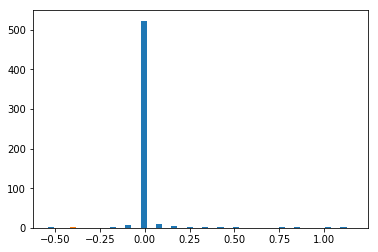

In [6]:
plt.hist(tf_lasso.coef_, bins=20)

In [8]:
lasso = LassoCV(alphas=[tf_lasso.alpha])
lasso.fit(feature_train_scaled_df, label_train_df['walking'])

LassoCV(alphas=[0.1], copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [13]:
tf_lasso.coef_.shape

AttributeError: 'tuple' object has no attribute 'shape'